# Customer Churn Features and Characteristics.

This project is an analysis of customer churn, features that are highly correlated with customer churn, and model development that can be used to detect customers who are likely to depart. This project also runs machine learning algorithims that can be used for detections and the development of marketing and retention programs.

In [31]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import plotly.io as pio
from IPython.display import Image
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [32]:
# Data for analysis and model development
df = pd.read_csv(r'C:\Users\Owner\Desktop\Churn_Modelling.csv')

# Data Overview

In [33]:
# Display the top of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
# Display the bottom of the dataframe
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [35]:
# See the columns data types and non-missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Manipulation

In [36]:
# MISSING VALUES
# Look at the percentage of missing values that are missing for each column
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [37]:
missing_values_table(df)

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [38]:
# Replace all occurrences of Not Available with numpy not a number
df = df.replace({'Not Available': np.nan})

In [39]:
# Columns with a high percentage of missing will likely not have much value
# Remove columns with more than 50% missing values
# Get the columns with > 50% missing values
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.
We will remove 0 columns.


In [40]:
#Remove Row ID from the data set
df = df.iloc[:,1:]


In [41]:
#Remove Customer ID and Customer Name from the data set
df = df.iloc[:,2:]

# Exploratory Data Analysis:


In [42]:
# Add categorical column for 1 and 0, churn and no churn
df['Churn'] = np.where(df['Exited'] >= 1, 'Yes', 'No')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,No


In [43]:
 df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Churn               object
dtype: object

In [44]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


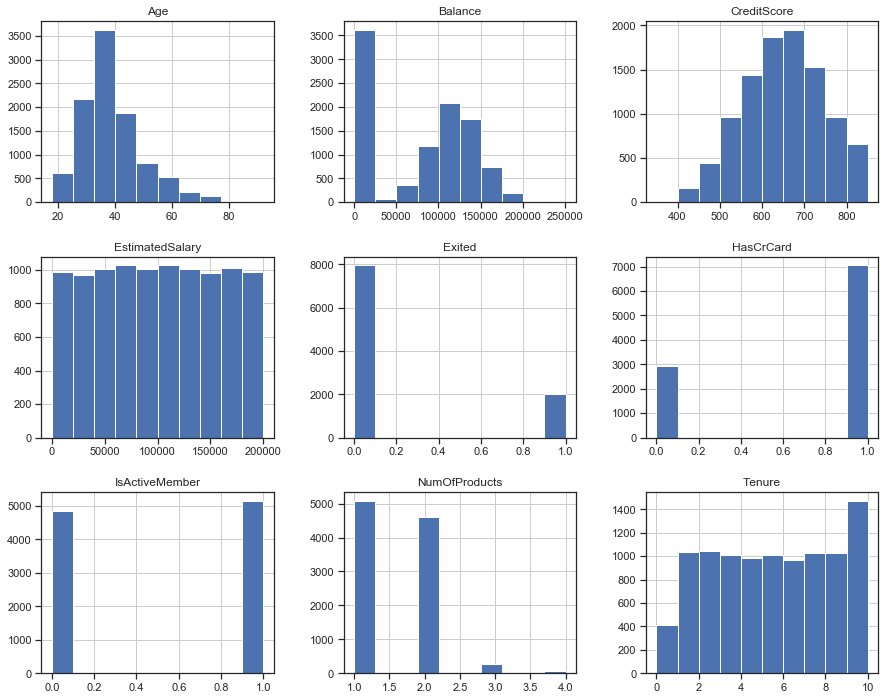

In [46]:
# plot histograms for each variable
df.hist(figsize = (15,12))

plt.show()

In [51]:
from IPython.core.display import display, HTML
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)

# Count of customer churn cases vs not churn in dataset
target = df['Churn'].value_counts()
levels = ['No','Yes']
trace = go.Pie(labels=target.index,values=target.values,
               marker=dict(colors=('blue','orange')))
layout = dict(title="Telco Customer Churn Ratio", margin=dict(l=150), width=500, height=500)
figdata = [trace]
fig = go.Figure(data=figdata, layout=layout)
iplot(fig)
# print target class counts
print(target)

No     7963
Yes    2037
Name: Churn, dtype: int64


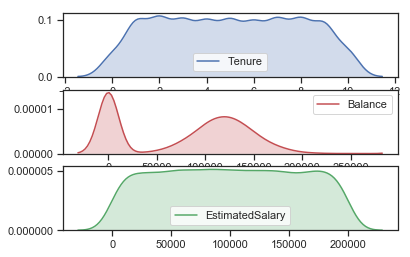

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
# Distribution of numeric features
fig, (ax1, ax2, ax3) = plt.subplots(3)
sns.kdeplot(df["Tenure"], shade=True, color="b",ax = ax1)
sns.kdeplot(df["Balance"], shade=True, color="r",ax = ax2)
sns.kdeplot(df["EstimatedSalary"], shade=True, color="g",ax = ax3)

In [25]:
# Let's visualize the churn on the basis of Gender
def bar_plot(col,df,barmode='group',width=800,height=600,color1='blue',color2='orange'):
    values = list(df[col].value_counts().keys())
    if values ==[0,1]:
        df[col].replace(0,'No',inplace=True)
        df[col].replace(1,'Yes',inplace=True)
        values = list(df[col].value_counts().keys())
    tr1 = df[df[col]==values[0]]['Churn'].value_counts().to_dict()
    tr2 = df[df[col]==values[1]]['Churn'].value_counts().to_dict()
    xx = ['Male', 'Female']
    trace1 = go.Bar(y=[tr1['No'], tr2['No']], name="Not Churn", x=values, marker=dict(color=color1))
    trace2 = go.Bar(y=[tr1['Yes'], tr2['Yes']], name="Churn", x=values, marker=dict(color=color2))
    df = [trace1, trace2]
    layout = go.Layout(
        barmode=barmode,xaxis = dict(title=col),yaxis=dict(title='Count'),
    title='Effect of '+ col + ' on Customer Churn',width=width,height=height)
    fig = go.Figure(data=df, layout=layout)
    iplot(fig)

In [26]:
# Comparison of churn between male and female
bar_plot('Gender',df)

In [31]:
# Let's visualize the churn ratio for customers who have a credit card.
bar_plot('HasCrCard',df,barmode='stack',width=600,height=400,color1='blue',color2='orange')

In [40]:
#let's visualize the impact of having partner on customer churn
bar_plot('IsActiveMember',df,barmode='stack',width=600,height=400,color1='blue',color2='orange')

In [41]:
#let's visualize the impact of having partner on customer churn
bar_plot('NumOfProducts',df,barmode='relative',width=600,height=400,color1='blue',color2='orange')

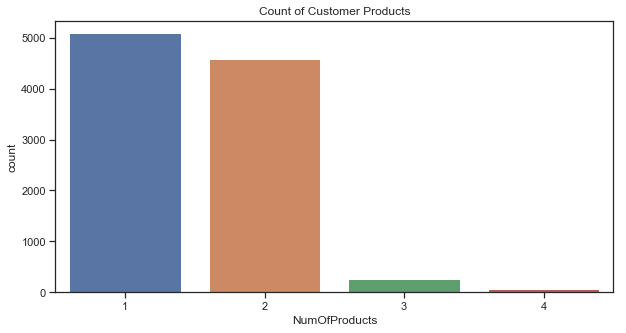

In [46]:
#counts of billing frequency or contacts
fig = plt.gcf()
fig.set_size_inches( 10, 5)
plt.title('Count of Customer Products')
sns.countplot(df['NumOfProducts'])

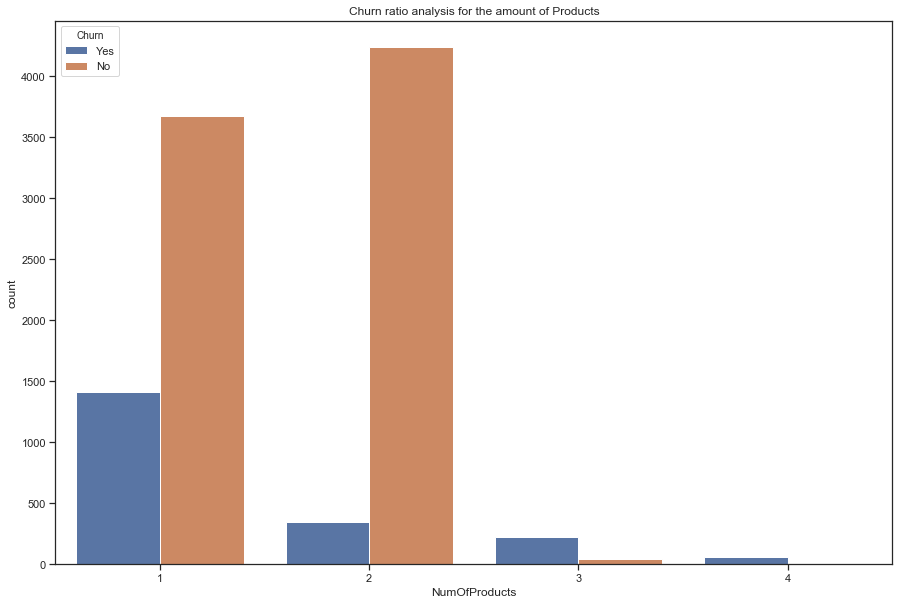

In [61]:
#Churn ratio analysis for different bill payment method
fig = plt.gcf()
fig.set_size_inches( 15, 10)
plt.title('Churn ratio analysis for the amount of Products')
sns.countplot(df['NumOfProducts'],hue=df['Churn'])

Text(0.5, 0, 'Churn')

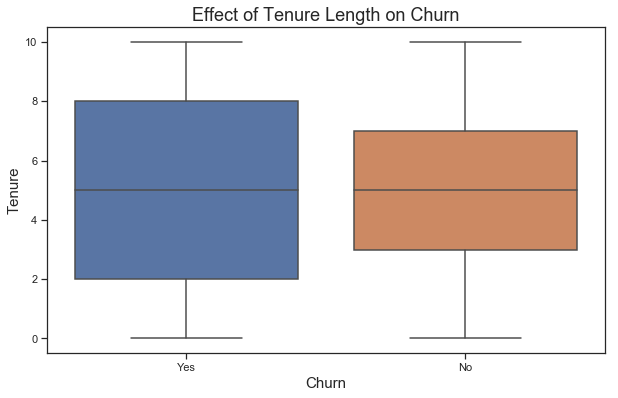

In [80]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Churn', y = 'Tenure', data=df)
ax.set_title('Effect of Tenure Length on Churn', fontsize=18)
ax.set_ylabel('Tenure', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

Text(0.5, 1.0, 'Number of Customers by Location')

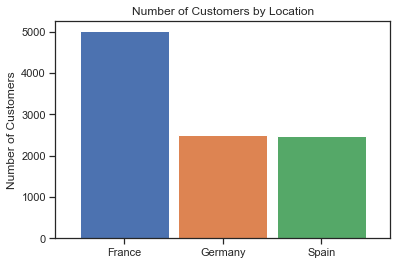

In [65]:
ax = df['Geography'].value_counts().plot(kind = 'bar',rot = 0, width = 0.9)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Location')

Text(0.5, 1.0, 'Distribution of Estimated Salary by Churn')

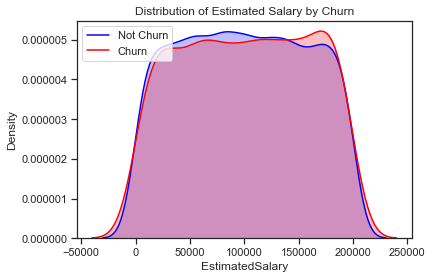

In [83]:
ax = sns.kdeplot(df.EstimatedSalary[(df["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(df.EstimatedSalary[(df["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper left')
ax.set_ylabel('Density')
ax.set_xlabel('EstimatedSalary')
ax.set_title('Distribution of Estimated Salary by Churn')

Text(0.5, 0, 'Churn')

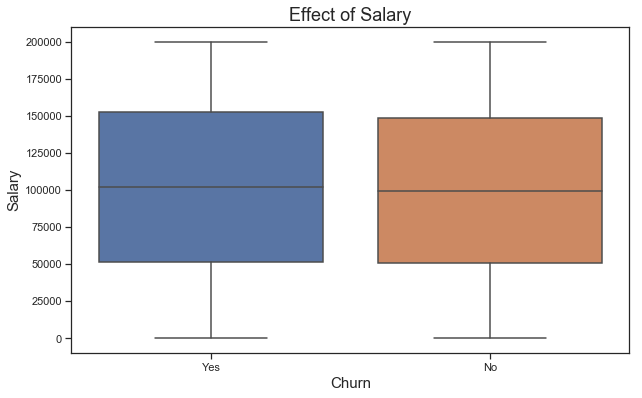

In [66]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Churn', y = 'EstimatedSalary', data=df)
ax.set_title('Effect of Salary', fontsize=18)
ax.set_ylabel('Salary', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

Text(0.5, 1.0, '# of Customers by Tenure')

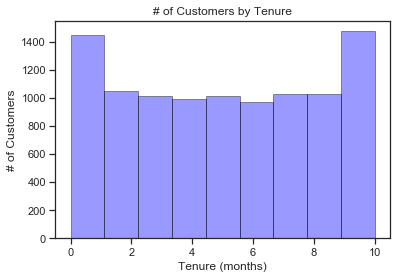

In [112]:
ax = sns.distplot(df['Tenure'], hist=True, kde=False, 
             bins=int(110/12), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by Tenure')

Text(0.5, 1.0, 'Number of Customers by Tenure')

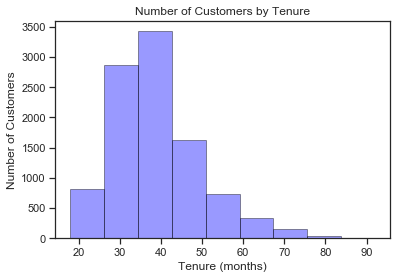

In [113]:
ax = sns.distplot(df['Age'], hist=True, kde=False, 
             bins=int(110/12), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Age')
ax.set_title('Number of Customers by Age')

# Feature Engineering 

Convert categorical features to numeric for model development and evaluation.

After going through the above EDA we will develop some predictive models and compare them.

The target feature is Churn.

In [183]:
# Drop labels that are not useful for model development
X = df.drop(labels=['Churn'],axis=1).copy()


In [264]:
#find list of categorical columns for encoding
cat_cols = []
for column in X.columns:
    if column not in ['Tenure','EstimatedSalary','Balance', 'Age', 'CreditScore']:
        cat_cols.append(column)

In [263]:
#Convert categorical columns to binary
X= pd.get_dummies(X,columns=cat_cols)

In [273]:
#shape after conversion of categorical features
X.head()

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.0000,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.0001,0.516,0.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.0002,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.0003,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,0.0004,1.000,0.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null int64
Gender             0 non-null float64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
Churn              10000 non-null object
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [266]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# Import Models

In [223]:
#import ML models and metrics
from sklearn.metrics import f1_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC



In [224]:
#train and target
y = df['Churn'].map({'Yes':1,'No':0})
X = df.drop(labels=['Churn'],axis=1).copy()

#create seperate train and test splits for validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [225]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [226]:
# Encoding for Geography 
df.Geography=df.Geography.map({'France':0,'Germany':1, 'Spain':2})

In [227]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [228]:
# Code to correct ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
df.fillna(-99999, inplace=True)

In [229]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [230]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7913333333333333


AxesSubplot(0.125,0.125;0.775x0.755)


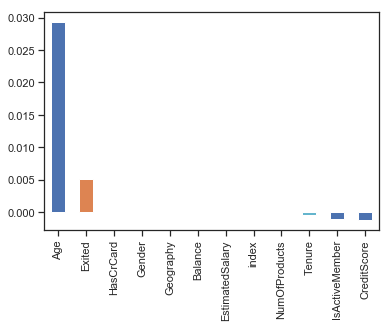

In [237]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:20].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


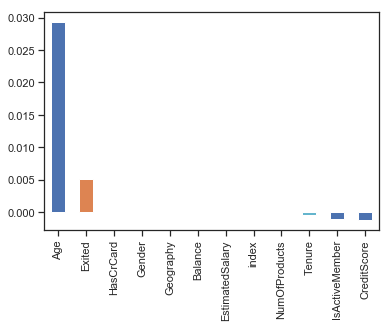

In [259]:
print(weights.sort_values(ascending = False)[-20:].plot(kind='bar'))

In [241]:
#create function for validation and return accuracy and roc-auc score
def evaluate_model(model):
    model.fit(X_train,y_train)
    prediction_test = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, prediction_test)
    rocauc = metrics.roc_auc_score(y_test, prediction_test)
    return accuracy,rocauc,prediction_test

In [242]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1)
acc,rocauc,testpred_lr  = evaluate_model(lr)
print('Logistic Regression...')
print('Accuracy score :',acc)
print('ROC-AUC score :',rocauc)

Logistic Regression...
Accuracy score : 0.7926666666666666
ROC-AUC score : 0.5


In [243]:
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
acc,rocauc,testpred_rf  = evaluate_model(rf)
print('Random Forest...')
print('Accuracy score :',acc)
print('ROC-AUC score :',rocauc)

Random Forest...
Accuracy score : 1.0
ROC-AUC score : 1.0


In [244]:
#set up search grid
#Number of search trees
n_estimators=range(50,100)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = range(4,8)
# Minimum number of samples required to split a node
min_samples_split = range(2,6)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,5)
# Method of selecting samples for training each tree
bootstrap = [True, False]
#criterion
criterion=['gini','entropy']
#create the random grid
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap,
              'criterion':criterion}
print(random_grid)

{'n_estimators': range(50, 100), 'max_features': ['auto', 'sqrt'], 'max_depth': range(4, 8), 'min_samples_split': range(2, 6), 'min_samples_leaf': range(1, 5), 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [245]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=2018)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=2, n_iter=100,random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': range(50, 100), 'max_features': ['auto', 'sqrt'], 'max_depth': range(4, 8), 'min_samples_split': range(2, 6), 'min_samples_leaf': range(1, 5), 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [247]:
#best params
params = rf_random.best_params_
params

{'n_estimators': 54,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 6,
 'criterion': 'entropy',
 'bootstrap': False}

In [249]:
rfc = RandomForestClassifier(**params,random_state=42)
rfc.fit(X_train,y_train)
acc,rocauc,testpred_rfc  = evaluate_model(rfc)
print('Random Forest Optimized...')
print('Accuracy score :',acc)
print('ROC-AUC score :',rocauc)

Random Forest Optimized...
Accuracy score : 1.0
ROC-AUC score : 1.0


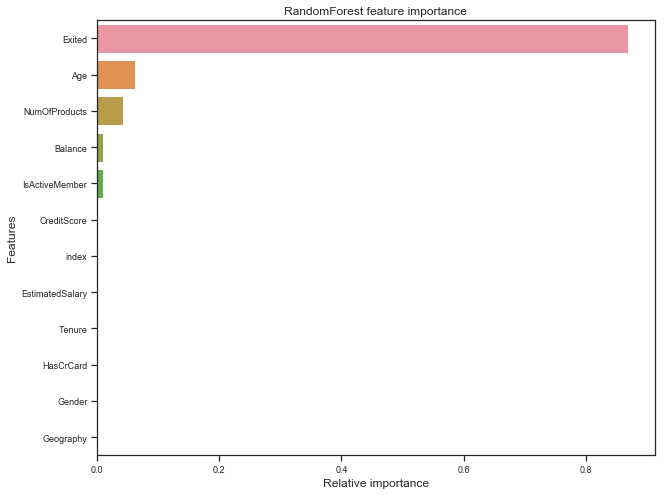

In [252]:
indices = np.argsort(rfc.feature_importances_)[::-1]
indices = indices[:45]

# Visualise these with a barplot
plt.subplots(figsize=(10, 8))
g = sns.barplot(y=X.columns[indices], x = rfc.feature_importances_[indices], orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("RandomForest feature importance");

In [260]:
#we define a plot_multiple_roc to visualise all the model curves together

def plot_multiple_roc(y_preds, y_test, model_names):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    
    for i in range (0, len(y_preds)):
        false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_preds[i])
        label = ""
        if len(model_names) > i:
            label = model_names[i]
        ax.plot(false_positive_rate, true_positive_rate, label=label)
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)
    ax.grid(True)
    
    ax.set(title='ROC Curves for Customer Churn Problem',
           xlabel = 'False positive Rate', ylabel = 'True positive rate')
        
    if len(model_names) > 0:
        plt.legend(loc=4)

In [261]:
validation_probs_fs = []
validation_probs_fs.append(testpred_lr)
validation_probs_fs.append(testpred_rfc)

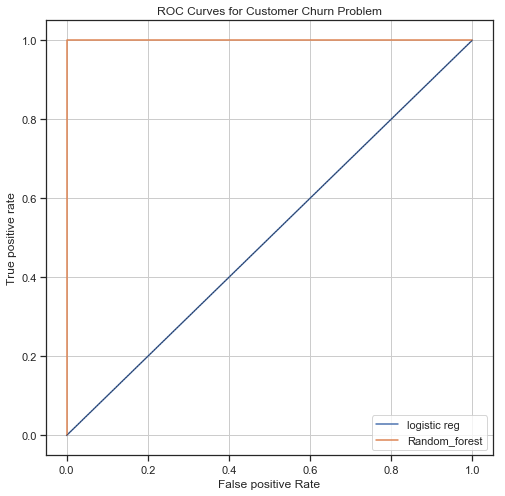

In [262]:
all_models_names = ['logistic reg', 'Random_forest']
plot_multiple_roc(validation_probs_fs, y_test, all_models_names)

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [271]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

1.0

In [269]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

1.0

# Conclusion:

We can see that some variables have a relationship to our predicted variable (Churn/Exited).  The exploratory data analysis revealed some features were related to a higher churn rate. Female customers churn at a higher rate than male customers. Non active members churn at a higher rate than active members. Customers with 1 product leave at a higher rate than customers with 2 products. Tenure and churn range between 2 and 8 years. Higher estimated salaries have a slightly higher churn distribution. Feature importance revealed that age, the number of products, active members, balance and credit score held some weight in regards to churn rate. 

Logistic Regression had a 79% accuracy rate, while Random Forest and SVC and AdaBoost have a perfect score. This is not the normal score in most cases. Further research and algorithims will be used to inspect the data.
